# Day 18 Pre-Class Assignment
---


### <p style="text-align: right;"> &#9989; Put your name here</p>

## Visual statistics or "It is DataViz all the way down"

<img src="https://imgs.xkcd.com/comics/normal_distribution.png" style="display:block; margin-left: auto; margin-right: auto; width: 70%" alt="The normal distribution, but cut horizontally instead of vertically.">
<p style="font-size:0.85em; text-align: center;">Credits: <a href="https://xkcd.com/2118/" target="_blank">xkcd.com</a></p>

### Learning goals for today's pre-class assignment

* Be able to articulate what a normal distribution is and its three main properties
* Learn to visually check for normality using Q-Q plots
* Learn to visually check for homoscedasticity
* Emphasize the need for good data visualization to guide our statistical conclusions.

## Assignment instructions

**This assignment is due by 11:59 p.m. the day before class,** and should be uploaded into the appropriate "Pre-class assignments" submission folder.  If you run into issues with your code, make sure to use Slack to help each other out and receive some assistance from the instructors. Submission instructions can be found at the end of the notebook.

**In this Notebook we'll be referring to means, variances, and standard deviations quite a bit. If you feel you need a refresher in these concepts, scroll to the bottom (before the survey) for a video covering these topics.**

----

## 1. The t-test: setting the stage

Last class we discussed the t-test as a very useful statistical test to check whether two populations have similar means or not. However, you must always remember that the t-test might fail if your data does not follow some requirements. 
- **[Normal distribution](https://en.wikipedia.org/wiki/Normal_distribution)**: data from both populations must be *sort of* normally distributed
- **[Homoscedasticity](https://en.wikipedia.org/wiki/Homoscedasticity_and_heteroscedasticity)**: the variance (or standard deviations) within each population is *sort of* the same

Notice that the key word in both conditions is *sort of*. But how much *sort of* is actually *sort of*? 

### 1.1 The usual pipeline (unfortunately)

You will see that a common practice is to:
1. You do [**Shapiro-Wilk**](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) statistical tests to check if your populations are normally distributed. Don't worry much about the true meaning of Shapiro-Wilk, just keep in mind that it will return a p-value.
2. You verify that all the Shapiro-Wilk **p-values** are *large* and you claim that all your populations are indeed normally distributed.
3. You then do a [**Levene**](https://en.wikipedia.org/wiki/Levene%27s_test) statistical test to check if your populations all share the save standard deviation. Don't worry much about the true meaning of Levene, just keep in mind that it will return a p-value.
4. You verify that the Levene **p-value** is *large* and you claim homoscedasticity.
5. Then you claim that the **t-test** conditions are met, so you can compute a bunch of t-tests and check the p-values.

In the last class we did the last step ignoring the previous four.

However, the pipeline described above should be discouraged. Shapiro-Wilk or Levene are just examples. Each test in a sense is like a Jenga piece, and the more tests you do based on other tests, the higher chances are that you have an unstable tower waiting to collapse. Some normality tests only truly work when you have limited data. Others only work when you have lots of data. Others work when you have "in-between" data. It can get messy.

### 1.2 DataViz as the alternative

That does not mean you can ignore normality and homoscedasticity requirements. It means that you should check for these conditions *visually* rather than *just* numerically. **Statistical testing is important, but it is only meaningful if it is supported with visualizations!**

- To check for normality, we will do Q-Q plots
- To check for homoscedasticity (*lovely mouthful*), we will visually replicate Levene's test.

## 2. Q-Q plots to check if our data follows this or that distribution

### 2.1 A word on probability distributions

Before we jump into Q-Q (quantile-quantile) plots, it is important we make sure we understand the meaning of "probability distributions".

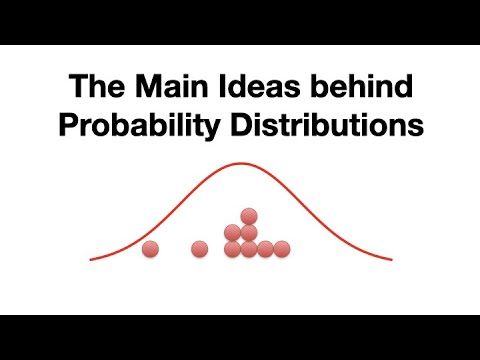

In [1]:
from IPython.display import YouTubeVideo  
YouTubeVideo("oI3hZJqXJuc",width=640,height=360)

&#9989;&nbsp; **Task 1** 

- Take the StatTest on probability distributions [here](https://docs.google.com/forms/d/e/1FAIpQLSeHARYnIgaZxl9HG5KOp8bR-t4WvwexXOabPP4KM4DkVGlVhQ/formResponse).
- Take a screenshot of your result and attach it along this Notebook.

### 2.2 A word on quantiles

As stated above, Q-Q stands for Quantile-Quantile. We discussed quantiles a bit when discussing boxplots. Remember that for a boxplot, the box represents the 25% and 75% quantiles, with a mark of the median (the 50% quantile) in between. 

Now watch this video on quantiles and how they are not limited to boxplots. Python also comes with nine different ways to compute quantiles.

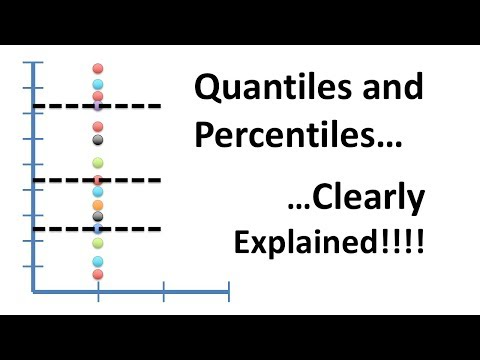

In [2]:
YouTubeVideo("IFKQLDmRK0Y",width=640,height=360)

&#9989;&nbsp; **Question 1** 

- Is there a practical difference when talking about quantiles instead of percentiles? Can we use them interchageably?

<font size=+3>&#9998;</font> *Put your three answers here.*


&#9989;&nbsp; **Question 2** 

Consider two sets of datapoints 
```python
a = [0, 1, 2, 3, 4]
b = [0, 1, 2, 3, 4, 5]
```

- Off the top of your head, can you guess which is the 50% quantile value for each array?

<font size=+3>&#9998;</font> *Put your three answers here.*


&#9989;&nbsp; **Task 3** 

- Now use NumPy to compute the 50% quantile for each of the arrays above. Did you guess correctly? 
- Does the quantile have to coincide with the value of a data point?

You can use NumPy's [function `np.quantile`](https://numpy.org/doc/stable/reference/generated/numpy.quantile.html).

In [3]:
# Your code

<font size=+3>&#9998;</font> *Put your three answers here.*


### 2.3 The Q-Q plot

Now that you know about probability distributions and quantiles, let's dig into quantile-quantile plots.

Watch the video below for a rundown on what a Q-Q plot is and how to use it.

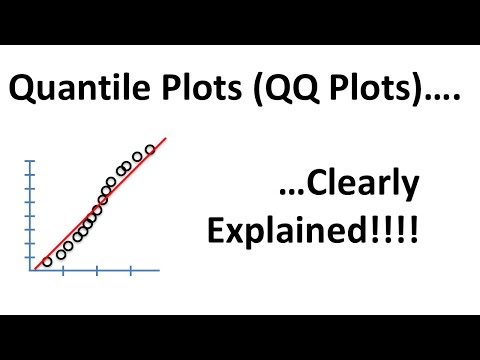

In [4]:
YouTubeVideo("okjYjClSjOg",width=640,height=360)

&#9989;&nbsp; **Question 4** 

List the three steps to get a Q-Q plot.

<font size=+3>&#9998;</font> *Put your three answers here.*

*
*
*

As mentioned by StatQuest, different probability distributions will produce different Q-Q plots. In the video, Josh shows two Q-Q plots for the same data, one based off a normal and another based off a uniform distribution. But there are many more distributions out there. 

Take a look at these eight Q-Q plots that use the same data but compared to different probability distributions (mentioned in the x-axis label of each plot):

<img src="https://www.researchgate.net/profile/Neveen-Kilany/publication/304657504/figure/fig2/AS:11431281164117142@1685635028883/Figure-Q-Q-plots-for-the-given-dataset_W640.jpg" style="display:block; margin-left: auto; margin-right: auto; width: 60%" alt="Eight different Q-Q plots based off the same data but different probability distributions.">
<p style="font-size:0.85em; text-align: center;">Adapted from: <a href="https://doi.org/10.1080/03610926.2016.1212069" target="_blank">Abd El-Monsef et al (2017)</a></p>

&#9989;&nbsp; **Question 5** 

Give it your best guess:

- Which distribution does the data seems to follow?
- How would you assess which Q-Q is the "best" one other than the eye-test?

<font size=+3>&#9998;</font> *Put your ideas here.*


---

## 3. Homoscedasticity for different populations

Remember that variance is the square of standard deviation:
$$\text{Variance} = \left(\text{Standard Deviation}\right)^2.$$
Because of that, if different populations have similar variances, they will also have similar standard deviations. The opposite is also true: similar standard deviations imply similar variances. We are going to replicate visually the Levene's test procedure to check for variance similarity.

Watch the following video on Levene's test. Don't worry much about the formulas or the software mentioned at the end (after the 2:30 mark). But pay attention to the visual steps.

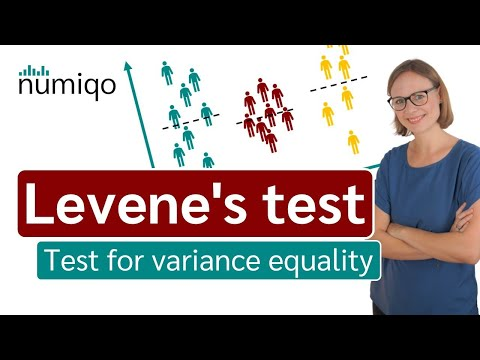

In [5]:
YouTubeVideo("x51GDTiPIfI",width=640,height=360, end=2*60+40)

&#9989;&nbsp; **Task 6** 

List the steps needed to calculate the Levene's test.
- The first step (at mark 1:30) is to calculate the mean of each group
- The last step (finishing at the 2:07 mark) is to compute the overall mean of the transformed values 

<font size=+3>&#9998;</font> *Put your ideas here.*


Ultimately, if our data is homoscedastic, the visual test should look like a uniform point cloud with no discernible patterns. Anything else indicates heteroscedasticity (different variances for different parts of the data)

<img src="https://benediktehinger.de/glm2018/images/homoscedasticity.png" style="display:block; margin-left: auto; margin-right: auto; width: 95%" alt="Three scatter plots. The leftmost one depicts homoscedastic data while the other two are heteroscdastic.">
<p style="font-size:0.85em; text-align: center;">Adapted from: <a href="https://benediktehinger.de/glm2018/lin_reg.html#/" target="_blank">Benedikt Ehinger</a></p>

---

## (If you need one) Quick stats reminder

So far we have mentioned means, variances, and standard deviations quite a bit. Here's a good StatQuest that goes over all the basic statistics concepts if you find yourself confused:
- Means
- Standard deviations
- Histograms
- Distributions

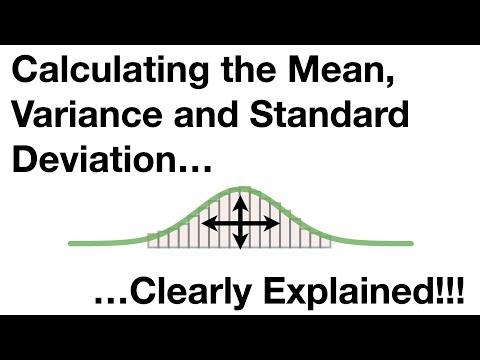

In [6]:
from IPython.display import YouTubeVideo  
YouTubeVideo("SzZ6GpcfoQY",width=640,height=360)

---

### Assignment wrap-up

Please fill out form from the link below. You must log-in using your MU credentials. **You must completely fill this out in order to receive credit for the assignment!** 

#### https://forms.office.com/r/37zmzq3PT8

In [7]:
# Click on the link above if this cell fails to produce a survey form.

from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/37zmzq3PT8" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Click the link above if this cell fails to produce a survey
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Canvas web page.  Go to the "Pre-class assignments" folder, find the appropriate submission folder link, and upload it there.

See you in class!

&#169; Copyright 2026,  Division of Plant Science & Technology&mdash;University of Missouri